# Criando os Nomes

In [1]:
import pandas as pd

In [7]:
nomes_m = pd.read_json('https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m')
nomes_f = pd.read_json('https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=f')

In [14]:
print(f'Quantidade de nomes: {len(nomes_f) + len(nomes_m)}')

Quantidade de nomes: 400


In [15]:
frames = [nomes_f, nomes_m]
frames

[          nome  regiao      freq  rank sexo
 0        MARIA       0  11694738     1    F
 1          ANA       0   3079729     2    F
 2    FRANCISCA       0    721637     3    F
 3      ANTONIA       0    588783     4    F
 4      ADRIANA       0    565621     5    F
 ..         ...     ...       ...   ...  ...
 195     ROSANE       0     82203   196    F
 196    IVONETE       0     81878   197    F
 197    LUCIANE       0     81230   198    F
 198    ISADORA       0     81100   199    F
 199      NILZA       0     80128   200    F
 
 [200 rows x 5 columns],
           nome  regiao     freq  rank sexo
 0         JOSE       0  5732508     1    M
 1         JOAO       0  2971935     2    M
 2      ANTONIO       0  2567494     3    M
 3    FRANCISCO       0  1765197     4    M
 4       CARLOS       0  1483121     5    M
 ..         ...     ...      ...   ...  ...
 195     WALTER       0    67207   196    M
 196    ARLINDO       0    66669   197    M
 197    MICHAEL       0    65736   19

In [17]:
nomes = pd.concat(frames)['nome'].to_frame()

In [19]:
nomes.sample(5)

,nome
35,ALEXANDRE
105,PABLO
78,WILSON
43,TEREZINHA
1,ANA


# Incluindo ID dos Alunos

In [20]:
import numpy as np
np.random.seed(123)

In [21]:
total_alunos = nomes.shape[0]
total_alunos

400

In [23]:
nomes['id_aluno'] = np.random.permutation(total_alunos) + 1
nomes.sample(5)

,nome,id_aluno
113,VICENTE,282
160,MOACIR,275
146,WILIAN,301
34,SEBASTIAO,29
61,CICERO,51


In [25]:
dominios = ['@dominiodoemail.com.br', '@servicodoemail.com']
nomes['dominio'] = np.random.choice(dominios, total_alunos)

In [26]:
nomes.sample(5)

,nome,id_aluno,dominio
178,DENILSON,354,@dominiodoemail.com.br
134,ALBERTO,209,@servicodoemail.com
51,ROGERIO,368,@servicodoemail.com
85,HELENA,155,@dominiodoemail.com.br
58,DAVI,375,@servicodoemail.com


In [27]:
nomes['email'] = nomes['nome'].str.cat(nomes['dominio']).str.lower()

In [29]:
nomes.sample(5)

,nome,id_aluno,dominio,email
75,NELSON,57,@servicodoemail.com,nelson@servicodoemail.com
18,RAIMUNDO,238,@dominiodoemail.com.br,raimundo@dominiodoemail.com.br
120,JOSIANE,138,@dominiodoemail.com.br,josiane@dominiodoemail.com.br
74,ALAN,379,@dominiodoemail.com.br,alan@dominiodoemail.com.br
71,MARTA,26,@servicodoemail.com,marta@servicodoemail.com


# Criando a Tabela Cursos

In [31]:
import html5lib
import lxml

In [34]:
url = 'http://tabela-cursos.herokuapp.com/index.html'
cursos = pd.read_html(url)
cursos

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [35]:
type(cursos)

list

In [37]:
cursos = cursos[0]

In [38]:
type(cursos)

pandas.core.frame.DataFrame

In [39]:
cursos.head()

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


# Alterando o index de cursos

In [41]:
cursos.rename(columns={'Nome do curso': 'nome_do_curso'}, inplace = True)

In [42]:
cursos.head()

,nome_do_curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


In [43]:
cursos['id'] = cursos.index + 1

In [44]:
cursos.head()

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5


In [45]:
cursos.set_index('id', inplace=True)

In [47]:
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


# Matriculando os alunos nos cursos

In [48]:
nomes.sample(5)

,nome,id_aluno,dominio,email
15,LETICIA,83,@servicodoemail.com,leticia@servicodoemail.com
167,ANGELO,364,@servicodoemail.com,angelo@servicodoemail.com
165,ISAIAS,108,@servicodoemail.com,isaias@servicodoemail.com
168,IARA,251,@dominiodoemail.com.br,iara@dominiodoemail.com.br
180,LIDIA,62,@dominiodoemail.com.br,lidia@dominiodoemail.com.br


In [55]:
nomes['matriculas'] = np.ceil(np.random.exponential(size = total_alunos) * 1.5).astype(int)

In [57]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
82,DAVID,188,@servicodoemail.com,david@servicodoemail.com,2
12,AMANDA,180,@dominiodoemail.com.br,amanda@dominiodoemail.com.br,1
110,LUCIENE,70,@dominiodoemail.com.br,luciene@dominiodoemail.com.br,3
178,ELIZANGELA,360,@servicodoemail.com,elizangela@servicodoemail.com,3
179,LILIANE,162,@servicodoemail.com,liliane@servicodoemail.com,3


In [58]:
nomes['matriculas'].describe()

count    400.000000
mean       1.990000
std        1.396343
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        8.000000
Name: matriculas, dtype: float64

In [59]:
import seaborn as sns

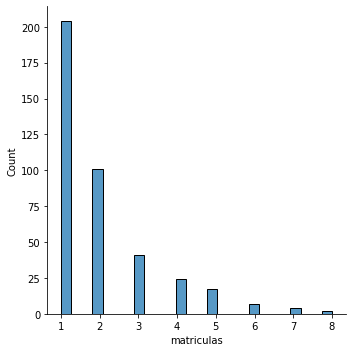

In [61]:
sns.displot(nomes.matriculas)

In [62]:
nomes.matriculas.value_counts()

1    204
2    101
3     41
4     24
5     17
6      7
7      4
8      2
Name: matriculas, dtype: int64

In [63]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
66,DANILO,313,@dominiodoemail.com.br,danilo@dominiodoemail.com.br,2
72,GILBERTO,371,@servicodoemail.com,gilberto@servicodoemail.com,4
72,CAROLINE,377,@servicodoemail.com,caroline@servicodoemail.com,2
111,CLEITON,93,@servicodoemail.com,cleiton@servicodoemail.com,1
80,TAIS,157,@dominiodoemail.com.br,tais@dominiodoemail.com.br,3


# Selecionando cursos

In [64]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
10,SANDRA,174,@servicodoemail.com,sandra@servicodoemail.com,1
52,SAMUEL,16,@servicodoemail.com,samuel@servicodoemail.com,1
3,ANTONIA,98,@servicodoemail.com,antonia@servicodoemail.com,1
179,LILIANE,162,@servicodoemail.com,liliane@servicodoemail.com,3
107,ELISANGELA,266,@servicodoemail.com,elisangela@servicodoemail.com,2


In [65]:
todas_matriculas = []
x = np.random.rand(20)
prob = x / sum(x)

In [66]:
x

array([0.24759162, 0.70484189, 0.58233831, 0.9968479 , 0.67803491,
       0.49842575, 0.12886173, 0.02732532, 0.33360394, 0.6331672 ,
       0.20195096, 0.62647956, 0.62044645, 0.21573073, 0.72416779,
       0.40210416, 0.57749127, 0.17622779, 0.25487165, 0.30070719])

In [67]:
for index, row in nomes.iterrows():
    id = row.id_aluno
    matriculas = row.matriculas
    for i in range(matriculas):
        mat = [id, np.random.choice(cursos.index, p = prob)]
        todas_matriculas.append(mat)
        
matriculas = pd.DataFrame(todas_matriculas, columns = ['id_aluno', 'id_curso'])

In [68]:
matriculas.head()

,id_aluno,id_curso
0,47,15
1,47,15
2,47,2
3,160,17
4,4,15


In [70]:
matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns = {'id_aluno': 'quantidade_de_alunos'})

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,15,Lógica de programação
2,72,Java para Web
3,58,C# para Web
4,76,Ruby on Rails
5,54,Cursos de Python
6,37,PHP com MySql
7,14,.NET para web
8,5,Novas integrações com Java
9,34,TDD com Java


In [71]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
123,EVANDRO,231,@dominiodoemail.com.br,evandro@dominiodoemail.com.br,3
41,CLAUDIO,192,@dominiodoemail.com.br,claudio@dominiodoemail.com.br,1
162,ISMAEL,220,@dominiodoemail.com.br,ismael@dominiodoemail.com.br,1


In [72]:
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


In [73]:
matriculas.head()

,id_aluno,id_curso
0,47,15
1,47,15
2,47,2
3,160,17
4,4,15


In [74]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns = {'id_aluno': 'quantidade_de_alunos'})

In [76]:
matriculas_por_curso.head()

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,15,Lógica de programação
2,72,Java para Web
3,58,C# para Web
4,76,Ruby on Rails
5,54,Cursos de Python


# Saída em diferentes formatos

In [77]:
matriculas_por_curso.head(3)

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,15,Lógica de programação
2,72,Java para Web
3,58,C# para Web


In [78]:
matriculas_por_curso.to_csv('matriculas_por_curso.csv', index=False)

In [79]:
pd.read_csv('matriculas_por_curso.csv')

,quantidade_de_alunos,nome_do_curso
0,15,Lógica de programação
1,72,Java para Web
2,58,C# para Web
3,76,Ruby on Rails
4,54,Cursos de Python
5,37,PHP com MySql
6,14,.NET para web
7,5,Novas integrações com Java
8,34,TDD com Java
9,52,Código limpo com C#


In [80]:
matriculas_json = matriculas_por_curso.to_json()

In [81]:
matriculas_json

'{"quantidade_de_alunos":{"1":15,"2":72,"3":58,"4":76,"5":54,"6":37,"7":14,"8":5,"9":34,"10":52,"11":22,"12":67,"13":58,"14":20,"15":60,"16":32,"17":55,"18":18,"19":26,"20":21},"nome_do_curso":{"1":"L\\u00f3gica de programa\\u00e7\\u00e3o","2":"Java para Web","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql","7":".NET para web","8":"Novas integra\\u00e7\\u00f5es com Java","9":"TDD com Java","10":"C\\u00f3digo limpo com C#","11":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","12":"Hardware b\\u00e1sico","13":"Persist\\u00eancia com .NET","14":"Desenvolvendo jogos","15":"An\\u00e1lise de dados","16":"Estat\\u00edstica b\\u00e1sica","17":"Internet das coisas","18":"Programa\\u00e7\\u00e3o funcional","19":"Boas pr\\u00e1ticas em Java","20":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

In [83]:
matriculas_html = matriculas_por_curso.to_html()
print(matriculas_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>quantidade_de_alunos</th>
      <th>nome_do_curso</th>
    </tr>
    <tr>
      <th>id_curso</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>15</td>
      <td>Lógica de programação</td>
    </tr>
    <tr>
      <th>2</th>
      <td>72</td>
      <td>Java para Web</td>
    </tr>
    <tr>
      <th>3</th>
      <td>58</td>
      <td>C# para Web</td>
    </tr>
    <tr>
      <th>4</th>
      <td>76</td>
      <td>Ruby on Rails</td>
    </tr>
    <tr>
      <th>5</th>
      <td>54</td>
      <td>Cursos de Python</td>
    </tr>
    <tr>
      <th>6</th>
      <td>37</td>
      <td>PHP com MySql</td>
    </tr>
    <tr>
      <th>7</th>
      <td>14</td>
      <td>.NET para web</td>
    </tr>
    <tr>
      <th>8</th>
      <td>5</td>
      <td>Novas integrações com Java</td>
    </tr>
    <tr>
      <th>9</th>
      <td>34</td>
 

# Criando o banco SQL

In [97]:
from sqlalchemy import create_engine, MetaData, Table, inspect

In [98]:
engine = create_engine('sqlite:///:memory:')

In [99]:
engine

Engine(sqlite:///:memory:)

In [100]:
type(engine)

sqlalchemy.engine.base.Engine

In [101]:
matriculas_por_curso.head()

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,15,Lógica de programação
2,72,Java para Web
3,58,C# para Web
4,76,Ruby on Rails
5,54,Cursos de Python


In [102]:
matriculas_por_curso.to_sql('matriculas', engine)

In [103]:
insp = inspect(engine)
print(insp.get_table_names())

['matriculas']


# Buscando do banco SQL

In [105]:
query = 'select * from matriculas where quantidade_de_alunos < 20'
pd.read_sql(query, engine)

,id_curso,quantidade_de_alunos,nome_do_curso
0,1,15,Lógica de programação
1,7,14,.NET para web
2,8,5,Novas integrações com Java
3,18,18,Programação funcional


In [107]:
pd.read_sql_table('matriculas', engine, columns = ['nome_do_curso', 'quantidade_de_alunos'])

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,15
1,Java para Web,72
2,C# para Web,58
3,Ruby on Rails,76
4,Cursos de Python,54
5,PHP com MySql,37
6,.NET para web,14
7,Novas integrações com Java,5
8,TDD com Java,34
9,Código limpo com C#,52


In [108]:
muitas_matriculas = pd.read_sql_table('matriculas', engine, columns = ['nome_do_curso', 'quantidade_de_alunos'])

In [112]:
muitas_matriculas = muitas_matriculas.query('quantidade_de_alunos > 70')
muitas_matriculas

,nome_do_curso,quantidade_de_alunos
1,Java para Web,72
3,Ruby on Rails,76


# Escrevendo no banco

In [116]:
muitas_matriculas.to_sql('muitas_matriculas', con=engine)

ValueError: Table 'muitas_matriculas' already exists.

In [122]:
insp = inspect(engine)
print(insp.get_table_names())

['matriculas', 'muitas_matriculas']


# Nomes dos alunos e alunas da próxima turma

In [123]:
matriculas_por_curso.head()

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,15,Lógica de programação
2,72,Java para Web
3,58,C# para Web
4,76,Ruby on Rails
5,54,Cursos de Python


In [124]:
matriculas.head()

,id_aluno,id_curso
0,47,15
1,47,15
2,47,2
3,160,17
4,4,15


In [125]:
id_curso = 1
proxima_turma = matriculas.query(f'id_curso == {id_curso}')
proxima_turma

,id_aluno,id_curso
41,235,1
65,229,1
84,168,1
143,305,1
254,385,1
344,121,1
390,303,1
429,271,1
461,45,1
476,200,1


In [126]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
55,DANIELE,278,@dominiodoemail.com.br,daniele@dominiodoemail.com.br,1
63,ERICA,267,@dominiodoemail.com.br,erica@dominiodoemail.com.br,5
113,VICENTE,282,@servicodoemail.com,vicente@servicodoemail.com,3


In [127]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))

,id_curso,nome,dominio,email,matriculas
id_aluno,,,,,
235,1,LARISSA,@servicodoemail.com,larissa@servicodoemail.com,4
229,1,CARLA,@dominiodoemail.com.br,carla@dominiodoemail.com.br,1
168,1,ANDREIA,@servicodoemail.com,andreia@servicodoemail.com,1
305,1,JANAINA,@servicodoemail.com,janaina@servicodoemail.com,2
385,1,JOICE,@servicodoemail.com,joice@servicodoemail.com,7
121,1,TAINARA,@servicodoemail.com,tainara@servicodoemail.com,4
303,1,DALVA,@dominiodoemail.com.br,dalva@dominiodoemail.com.br,6
271,1,LUIS,@dominiodoemail.com.br,luis@dominiodoemail.com.br,3
45,1,LEANDRO,@dominiodoemail.com.br,leandro@dominiodoemail.com.br,2


In [128]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome']

id_aluno
235      LARISSA
229        CARLA
168      ANDREIA
305      JANAINA
385        JOICE
121      TAINARA
303        DALVA
271         LUIS
45       LEANDRO
200    ALEXANDRE
257        PABLO
42         ITALO
101      ARNALDO
206        CELIO
299        ODAIR
Name: nome, dtype: object

In [129]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

,nome
id_aluno,
235,LARISSA
229,CARLA
168,ANDREIA
305,JANAINA
385,JOICE
121,TAINARA
303,DALVA
271,LUIS
45,LEANDRO


In [131]:
nome_curso = cursos.loc[id_curso]
nome_curso

nome_do_curso    Lógica de programação
Name: 1, dtype: object

In [132]:
nome_curso = nome_curso.nome_do_curso
nome_curso

'Lógica de programação'

In [133]:
proxima_turma = proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

In [134]:
proxima_turma.rename(columns={'nome': f'Alunos do curso de {nome_curso}'}, inplace = True)

In [137]:
proxima_turma.sample(5)

,Alunos do curso de Lógica de programação
id_aluno,
101,ARNALDO
121,TAINARA
257,PABLO
303,DALVA
235,LARISSA


# Excel

In [139]:
proxima_turma.to_excel('proxima_turma.xlsx', index=False)

In [140]:
pd.read_excel('proxima_turma.xlsx')

,Alunos do curso de Lógica de programação
0,LARISSA
1,CARLA
2,ANDREIA
3,JANAINA
4,JOICE
5,TAINARA
6,DALVA
7,LUIS
8,LEANDRO
9,ALEXANDRE
